In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import json
import random
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import backend as K
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.models import model_from_json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


%matplotlib inline

Using TensorFlow backend.
C:\Users\sidew\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.chdir("C:/Users/sidew/Desktop/New folder/")

In [3]:
with open("shipsnet.json", "r") as read_file:
    data = json.load(read_file)

In [ ]:
# index = 170
# pixel_vals = x[index]
# arr = np.array(pixel_vals).astype('uint8')
# im = arr.reshape((3, 6400)).T.reshape((80,80,3))
# plt.imshow(im)

# cv2.imshow('dfg',x[1].reshape(3, 6400).T.reshape([80,80,3]))
# cv2.waitKey()
# cv2.destroyAllWindows

In [4]:
x = np.array(data['data']).astype('uint8')
y = np.array(data['labels']).astype('uint8')

In [6]:
x.shape

(4000, 19200)

1

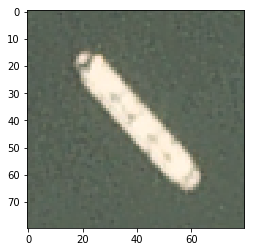

In [8]:
im = x[0].reshape((3, 6400)).T.reshape((80,80,3))
plt.imshow(im)
y[0]

In [9]:
random.seed(7)
reter = random.sample(range(4000), 4000)

In [10]:
randomiz_x = x[reter,:]
randomiz_y = y[reter]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(randomiz_x, randomiz_y, test_size=0.3, random_state=0, stratify= randomiz_y)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1, stratify = y_train)

In [13]:
print(len(y_train))
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))
print(len(y_val))
print(np.sum(y_val == 1))
print(np.sum(y_val == 0))
print(len(y_test))
print(np.sum(y_test == 1))
print(np.sum(y_test == 0))

2520
630
1890
280
70
210
1200
300
900


# KERAS IMPORTANCE OF NORMALIZATION - 75 TO 96

In [14]:
Keras_X_train = X_train
Keras_X_val = X_val
Keras_X_test = X_test

Keras_X_train = Keras_X_train.astype('float32')
Keras_X_test = Keras_X_test.astype('float32')
Keras_X_val = Keras_X_val.astype('float32')

# Keras_X_train/= 255.0
# Keras_X_test/= 255.0
# Keras_X_val/= 255.0

Keras_X_train = Keras_X_train.reshape([-1,80,80,3])
Keras_X_val = Keras_X_val.reshape([-1,80,80,3])
Keras_X_test = Keras_X_test.reshape([-1,80,80,3])

In [15]:
Keras_y_train = y_train
Keras_y_val = y_val
Keras_y_test = y_test

Keras_y_train = to_categorical(Keras_y_train)
Keras_y_val = to_categorical(Keras_y_val)
Keras_y_test = to_categorical(Keras_y_test)

In [16]:
Keras_y_train[1]

array([1., 0.], dtype=float32)

In [19]:
classes = ['no ship', 'ship']
num_classes = len(classes)
new_model = Sequential()

new_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape = (80,80,3)))
new_model.add(Dropout(0.20))

new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(Dropout(0.20))

new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(Dropout(0.20))

new_model.add(Flatten())
new_model.add(Dense(64,activation='relu'))
new_model.add(Dropout(0.20))
new_model.add(Dense(num_classes, activation='softmax'))

#compile model
new_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])



In [20]:
new_model.fit(Keras_X_train, Keras_y_train, validation_data=(Keras_X_val, Keras_y_val), epochs=10, batch_size=32, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 2520 samples, validate on 280 samples
Epoch 1/10
2520/2520 [==============================] - 179s 71ms/step - loss: 4.0709 - acc: 0.7460 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 2/10
2520/2520 [==============================] - 176s 70ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 3/10
2520/2520 [==============================] - 175s 69ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 4/10
2520/2520 [==============================] - 174s 69ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 5/10
2520/2520 [==============================] - 183s 72ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 6/10
2520/2520 [==============================] - 179s 71ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 7/10
2520/2520 [==============================] - 174s 69ms/step - loss: 4.02

In [21]:
sgd_without_stratify = new_model.to_json()
with open("swiths.json", "w") as json_file:
    json_file.write(sgd_without_stratify)
new_model.save_weights("swiths.h5")

In [22]:
json_file = open('swiths.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("swiths.h5")

In [24]:
dfio = loaded_model.predict(Keras_X_test)
cfio = np.argmax(dfio, axis=1)
gfio = np.argmax(Keras_y_test, axis = 1)
accuracy_score(gfio, cfio)

0.75

In [28]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [29]:
X_train/= 255
X_test/= 255
X_val/= 255

In [9]:
#Convolutional Layer 1
filter_size1 = 3 
num_filters1 = 32

# Convolutional Layer 2.
filter_size2 = 3
num_filters2 = 32

# Convolutional Layer 3.
filter_size3 = 3
num_filters3 = 64

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 80

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = ['no ship', 'ship']
num_classes = len(classes)
cfgt = np.array([[0, 1]])

# batch size
batch_size = 32

In [10]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [11]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [12]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)


    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
       
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [13]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [14]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [15]:
a = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='a')

In [16]:
b_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='b_true')

In [17]:
a_image = tf.reshape(a, [-1, img_size, img_size, num_channels])

In [18]:
b_true_cls = tf.argmax(b_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [19]:
layer_conv1, weights_conv1 = new_conv_layer(input = a_image, num_input_channels = num_channels, filter_size = filter_size1,
                                            num_filters = num_filters1, use_pooling = True)

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 40, 40, 32) dtype=float32>

In [21]:
layer_conv2, weights_conv2 = new_conv_layer(input=layer_conv1, num_input_channels=num_filters1, filter_size=filter_size2,
                                            num_filters=num_filters2, use_pooling=True)

In [22]:
layer_conv2

<tf.Tensor 'Relu_1:0' shape=(?, 20, 20, 32) dtype=float32>

In [23]:
layer_conv3, weights_conv3 = new_conv_layer(input=layer_conv2, num_input_channels=num_filters2, filter_size=filter_size3, 
                                            num_filters=num_filters3, use_pooling=True)

In [24]:
layer_conv3

<tf.Tensor 'Relu_2:0' shape=(?, 10, 10, 64) dtype=float32>

In [25]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [26]:
layer_flat, num_features

(<tf.Tensor 'Reshape_1:0' shape=(?, 6400) dtype=float32>, 6400)

In [27]:
layer_fc1 = new_fc_layer(input=layer_flat, num_inputs=num_features, num_outputs=fc_size, use_relu=True)

In [28]:
layer_fc1

<tf.Tensor 'Relu_3:0' shape=(?, 128) dtype=float32>

In [29]:
layer_fc2 = new_fc_layer(input=layer_fc1, num_inputs=fc_size, num_outputs=num_classes, use_relu=False)

In [30]:
layer_fc2

<tf.Tensor 'add_4:0' shape=(?, 2) dtype=float32>

In [31]:
y_pred = tf.nn.softmax(layer_fc2)

In [35]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [32]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=b_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [33]:
cost = tf.reduce_mean(cross_entropy)

In [34]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [36]:
shape_dim = len(X_val)
vald = X_val.reshape([shape_dim,19200])
init = tf.global_variables_initializer()
steps = 1000
batch_size = 30
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    accuracy_list = []
    for i in range(steps):
        rand_list = np.random.randint(0,2519,batch_size)
        batch_x = X_train[rand_list]
        get_y = tf.one_hot(y_train[rand_list],2)
        batch_y = np.array(sess.run(get_y))
        sess.run(optimizer,feed_dict={a:batch_x,b_true:batch_y}) #,keep_prob:0.5
        if i%30 == 0:
            val_pred = sess.run(y_pred_cls, feed_dict = {a:vald,b_true:cfgt})
            print("Results from step: {}".format(i))
            matches = tf.equal(y_pred_cls,b_true_cls)
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            acc2 = sess.run(acc,feed_dict={a:batch_x,b_true:batch_y}) #,keep_prob:1.0
            print('{} is the accuracy on training set'.format(acc2))
            print('{} is the accuracy on validation set'.format(accuracy_score(y_val, val_pred)))
            accuracy_list.append(acc2)
    
    saver.save(sess, 'C:/Users/sidew/Desktop/New folder/models/model-1')

Results from step: 0
0.6666666865348816 is the accuracy on training set
0.6642857142857143 is the accuracy on validation set
Results from step: 30
0.7333333492279053 is the accuracy on training set
0.8 is the accuracy on validation set
Results from step: 60
0.9333333373069763 is the accuracy on training set
0.8785714285714286 is the accuracy on validation set
Results from step: 90
0.9333333373069763 is the accuracy on training set
0.8821428571428571 is the accuracy on validation set
Results from step: 120
0.9666666388511658 is the accuracy on training set
0.9107142857142857 is the accuracy on validation set
Results from step: 150
0.9666666388511658 is the accuracy on training set
0.9178571428571428 is the accuracy on validation set
Results from step: 180
0.9666666388511658 is the accuracy on training set
0.9357142857142857 is the accuracy on validation set
Results from step: 210
1.0 is the accuracy on training set
0.9321428571428572 is the accuracy on validation set
Results from step: 

In [37]:
sess = tf.Session()
saver = tf.train.import_meta_graph('C:/Users/sidew/Desktop/New folder/models/model-1.meta')
saver.restore(sess,tf.train.latest_checkpoint('C:/Users/sidew/Desktop/New folder/models/'))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:/Users/sidew/Desktop/New folder/models/model-1


In [38]:
shape_test = len(X_test)
tes = X_test.reshape([shape_test,19200])
tes_pred = sess.run(y_pred_cls, feed_dict = {a:tes,b_true:cfgt})
tes_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [39]:
print(accuracy_score(y_test, tes_pred))

0.9791666666666666


[[<matplotlib.axis.YTick at 0x224825e9cc0>,
 Text(0,0.5,'True label'),
 Text(0.5,0,'Predicted label')]

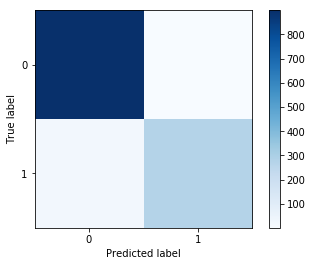

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tes_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), ylabel='True label',xlabel='Predicted label')

In [42]:
cm

array([[899,   1],
       [ 24, 276]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
repo = classification_report(y_test, tes_pred, target_names=target_names)
print(repo)

             precision    recall  f1-score   support

    class 0       0.97      1.00      0.99       900
    class 1       1.00      0.92      0.96       300

avg / total       0.98      0.98      0.98      1200



In [124]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = sess.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

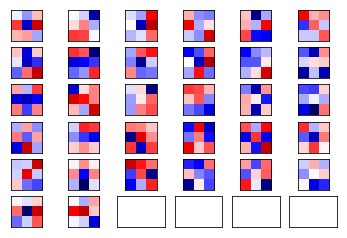

In [141]:
plot_conv_weights(weights=weights_conv2)

In [142]:
sess.close()

# KERAS CNN WITH SGD OPTIMIZER AND NORMALIZED

In [43]:
k_x = x
k_y = y

In [44]:
k_x = k_x.reshape([-1,80,80,3])
print(k_x.shape)
print(k_y.shape)

(4000, 80, 80, 3)
(4000,)


In [45]:
k_x_train, k_x_test, k_y_train, k_y_test = train_test_split(k_x, k_y, test_size=0.3, random_state=7)

In [ ]:
print(len(k_y_train))
print(np.sum(k_y_train == 1))
print(np.sum(k_y_train == 0))
# print(len(k_y_val))
# print(np.sum(k_y_val == 1))
# print(np.sum(k_y_val == 0))
print(len(k_y_test))
print(np.sum(k_y_test == 1))
print(np.sum(k_y_test == 0))

In [46]:
k_x_train = k_x_train.astype('float32')
k_x_test = k_x_test.astype('float32')
k_x_train/= 255.0
k_x_test/= 255.0

In [47]:
k_y_train = to_categorical(k_y_train)
k_y_test = to_categorical(k_y_test)

In [48]:
new_model = Sequential()

new_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape = (80,80,3)))
new_model.add(Dropout(0.20))

new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(Dropout(0.20))

new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(Dropout(0.20))

new_model.add(Flatten())
new_model.add(Dense(64,activation='relu'))
new_model.add(Dropout(0.20))
new_model.add(Dense(num_classes, activation='softmax'))

#compile model
new_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#fit the model
history= new_model.fit(k_x_train, k_y_train, validation_data=(k_x_test, k_y_test), epochs=10, batch_size=32, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2800 samples, validate on 1200 samples
Epoch 1/10
2800/2800 [==============================] - 228s 82ms/step - loss: 0.4724 - acc: 0.7979 - val_loss: 0.3625 - val_acc: 0.8583
Epoch 2/10
2800/2800 [==============================] - 224s 80ms/step - loss: 0.3421 - acc: 0.8604 - val_loss: 0.3408 - val_acc: 0.8758
Epoch 3/10
2800/2800 [==============================] - 225s 80ms/step - loss: 0.2762 - acc: 0.8779 - val_loss: 0.2677 - val_acc: 0.9125
Epoch 4/10
2800/2800 [==============================] - 223s 80ms/step - loss: 0.2369 - acc: 0.8996 - val_loss: 0.2511 - val_acc: 0.9117
Epoch 5/10
2800/2800 [==============================] - 221s 79ms/step - loss: 0.2187 - acc: 0.9054 - val_loss: 0.2615 - val_acc: 0.9008
Epoch 6/10
2800/2800 [==============================] - 227s 81ms/step - loss: 0.1802 - acc: 0.9218 - va

In [54]:
sgd_with_stratify = new_model.to_json()
with open("sws.json", "w") as json_file:
    json_file.write(sgd_without_stratify)
new_model.save_weights("sws.h5")

In [58]:
json_file = open('sws.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("sws.h5")

In [66]:
xdf = loaded_model.predict(k_x_test)
ftyu = np.argmax(xdf, axis = 1)
accuracy_score(ftyu, np.argmax(k_y_test, axis = 1))

0.9766666666666667

# KERAS CNN WITH ADAM OPTIMIZER AND DIFFERENT STRUCTURE

In [67]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [68]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(k_x_train, k_y_train,
          batch_size=30,
          epochs=15,
          verbose=1,
          validation_data=(k_x_test, k_y_test))

Train on 2800 samples, validate on 1200 samples
Epoch 1/15
2800/2800 [==============================] - 34s 12ms/step - loss: 0.3096 - acc: 0.8846 - val_loss: 0.2058 - val_acc: 0.9133
Epoch 2/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.1589 - acc: 0.9432 - val_loss: 0.1846 - val_acc: 0.9267
Epoch 3/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.1136 - acc: 0.9604 - val_loss: 0.0775 - val_acc: 0.9733
Epoch 4/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.0651 - acc: 0.9786 - val_loss: 0.0666 - val_acc: 0.9808
Epoch 5/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.0419 - acc: 0.9846 - val_loss: 0.0803 - val_acc: 0.9708
Epoch 6/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.0375 - acc: 0.9868 - val_loss: 0.0445 - val_acc: 0.9842
Epoch 7/15
2800/2800 [==============================] - 31s 11ms/step - loss: 0.0189 - acc: 0.9946 - val_loss: 0.0258 - val_acc: 0.9892


In [69]:
adam_without_stratify = model.to_json()
with open("aws.json", "w") as json_file:
    json_file.write(adam_without_stratify)
model.save_weights("aws.h5")

In [84]:
json_file = open('aws.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("aws.h5")

In [85]:
xdf = loaded_model.predict(k_x_test)
ftyu = np.argmax(xdf, axis = 1)
accuracy_score(ftyu, np.argmax(k_y_test, axis = 1))

0.9916666666666667

# Extracting features from the Convolution Layer

In [88]:
#The Ninth layer in the Keras CNN has the probability scores for each of the classes. Hence this output needs to be extracted
#in order to train other algorithms

from keras.models import Model
extract = Model(new_model.layers[0].input, new_model.layers[9].output)

In [89]:
#Creating a dataframe of the probability values for the two classes along with the actual labels

features = extract.predict(k_x_train)
a,b = zip(*features)
extract_y_train = np.argmax(k_y_train, axis = 1)
a = list(a)
b = list(b)
d = {'a':a,'b':b,'y': extract_y_train}
df_train = pd.DataFrame(d)

In [90]:
df_train.head()

,a,b,y
0,0.976469,0.023530,0
1,0.995936,0.004064,0
2,0.000939,0.999061,1
3,0.999932,0.000068,0
4,0.998583,0.001417,0


In [91]:
# Performing the same operations on the test data too

features_test = extract.predict(k_x_test)
r,t = zip(*features_test)
extract_y_test = np.argmax(k_y_test, axis = 1)
r = list(r)
t = list(t)
d_test = {'a':r,'b':t, 'y':extract_y_test}
df_test = pd.DataFrame(d_test)

In [143]:
df_test.head()

,a,b,y
0,0.999952,0.000048,0
1,0.000220,0.999780,1
2,0.008845,0.991155,1
3,0.999948,0.000052,0
4,0.000433,0.999567,1


In [93]:
# Specifying the Predictors and Target variables for train and test

e_x_train = df_train[['a','b']]
e_y_train = df_train['y']
e_x_test = df_test[['a','b']]
e_y_test = df_test['y']

# RANDOM FOREST WITH FEATURES EXTRACTED FROM CNN

In [94]:
random_forest = RandomForestClassifier(random_state = 12)
grid = {'n_estimators' : [200,250,300], 'max_leaf_nodes' : range(12,16)}

# count = 1
# for g in ParameterGrid(grid):
#     random_forest.set_params(**g)
#     random_forest.fit(extracted_X_train, extracted_y_train)
#     print(count)
#     print('/n')
#     print('Accuracy on training set : ', random_forest.score(extracted_X_train, extracted_y_train))
#     print('Accuracy on validation set : ', random_forest.score(extracted_X_val, extracted_y_val))
#     print('Accuracy on test set : ', random_forest.score(extracted_X_test, extracted_y_test))
#     print('/n')
#     count += 1



Grid_forest = GridSearchCV(random_forest, grid, n_jobs = -1, cv = 5, scoring = 'accuracy')
Grid_forest.fit(e_x_train, e_y_train)

print('Accuracy on training set : ', Grid_forest.score(e_x_train, e_y_train))
print('Accuracy on test set : ', Grid_forest.score(e_x_test, e_y_test))

print('best parameters:', Grid_forest.best_params_)
print('Best cross-validation score:', Grid_forest.best_score_)

Accuracy on training set :  0.9985714285714286
Accuracy on test set :  0.9958333333333333
best parameters: {'max_leaf_nodes': 12, 'n_estimators': 200}
Best cross-validation score: 0.9935714285714285


In [182]:
rf_pred = Grid_forest.predict(e_x_test)

[[<matplotlib.axis.YTick at 0x22529ef3a58>,
 Text(0,0.5,'True label'),
 Text(0.5,0,'Predicted label')]

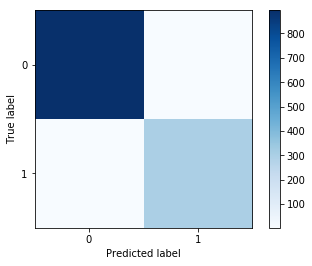

In [183]:
#Creating a confusion matrix and plotting it. The variations in numbers is depicted by different shades of colour
#A darker shade indicates higher number

cm4 = confusion_matrix(e_y_test, rf_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm4, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm4.shape[1]), yticks=np.arange(cm4.shape[0]), ylabel='True label',xlabel='Predicted label')

In [184]:
cm4

array([[895,   2],
       [  3, 300]], dtype=int64)

# SVM WITH FEATURES EXTRACTED FROM CNN

In [96]:
SVM_model = SVC(kernel = 'rbf', probability=True)
SVM_parameters = {'C': [1,10,100,1000,10000],'gamma':[0.0001,0.001,0.1,1,10]}

grid_svm = GridSearchCV(SVM_model, SVM_parameters, cv=5, n_jobs=-1, scoring='accuracy')
grid_svm.fit(e_x_train, e_y_train)

print('SVM training set score: ', grid_svm.score(e_x_train, e_y_train))
print('SVM test set score: ', grid_svm.score(e_x_test, e_y_test))


print('SVM best parameters: ', grid_svm.best_params_)
print('Best cross-validation score:', grid_svm.best_score_)

SVM training set score:  0.995
SVM test set score:  0.9958333333333333
SVM best parameters:  {'C': 10, 'gamma': 10}
Best cross-validation score: 0.9942857142857143


In [178]:
svm_pred = grid_svm.predict(e_x_test)

[[<matplotlib.axis.YTick at 0x22529e67c18>,
 Text(0,0.5,'True label'),
 Text(0.5,0,'Predicted label')]

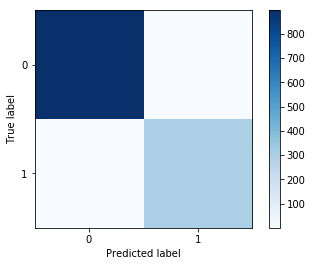

In [180]:
cm3 = confusion_matrix(e_y_test, svm_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm3, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm3.shape[1]), yticks=np.arange(cm3.shape[0]), ylabel='True label',xlabel='Predicted label')

In [181]:
cm3

array([[896,   1],
       [  4, 299]], dtype=int64)

# LOGISTIC REGRESSION USING FEATURES EXTRACTED FROM CNN

In [97]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression().fit(e_x_train, e_y_train)

# print('LOGISTIC REGRESSION \n')
# print("logistic regression coefficients:", lr_model.coef_)
# print("logistic regression intercepts:", lr_model.intercept_)

print("Training set score: ", lr_model.score(e_x_train, e_y_train))
print("Test set score: ", lr_model.score(e_x_test, e_y_test))

Training set score:  0.9939285714285714
Test set score:  0.9958333333333333


In [175]:
lr_pred = lr_model.predict(e_x_test)

[[<matplotlib.axis.YTick at 0x2248c5bd9e8>,
 Text(0,0.5,'True label'),
 Text(0.5,0,'Predicted label')]

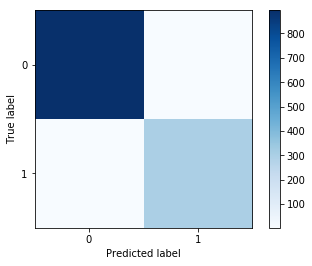

In [176]:
cm2 = confusion_matrix(e_y_test, lr_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm2, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm2.shape[1]), yticks=np.arange(cm2.shape[0]), ylabel='True label',xlabel='Predicted label')

In [177]:
cm2

array([[895,   2],
       [  3, 300]], dtype=int64)

# DECISION TREE USING FEATURES EXTRACTED FROM CNN

In [98]:
from sklearn.tree import DecisionTreeClassifier
optimal_tree = DecisionTreeClassifier(random_state = 13)
tree_parameters = {'criterion' : ["gini","entropy"],'max_depth' : range(5,16), 'min_samples_split' : range(12,20), 
              'min_samples_leaf' : range(12,20)}

Grid_tree = GridSearchCV(optimal_tree, tree_parameters, n_jobs = -1, cv = 5, scoring = 'accuracy')
Grid_tree.fit(e_x_train,e_y_train)

print('\n DECISION TREE \n')
print('Accuracy on training set : ', Grid_tree.score(e_x_train, e_y_train))
print('Accuracy on test set : ', Grid_tree.score(e_x_test, e_y_test))

print('best parameters:', Grid_tree.best_params_)
print('Best cross-validation score:', Grid_tree.best_score_)


 DECISION TREE 

Accuracy on training set :  0.995
Accuracy on test set :  0.9958333333333333
best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 12}
Best cross-validation score: 0.9939285714285714


In [166]:
tree_pred = Grid_tree.predict(e_x_test)

In [172]:
type(e_y_test)

pandas.core.series.Series

[[<matplotlib.axis.YTick at 0x2248c543208>,
 Text(0,0.5,'True label'),
 Text(0.5,0,'Predicted label')]

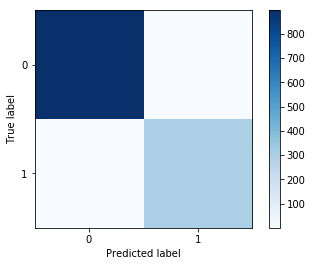

In [173]:
cm1 = confusion_matrix(e_y_test, tree_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm1, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm1.shape[1]), yticks=np.arange(cm1.shape[0]), ylabel='True label',xlabel='Predicted label')

In [174]:
cm1

array([[896,   1],
       [  4, 299]], dtype=int64)

In [111]:
cnn_probabilities = new_model.predict(k_x_test)
cnn_probabilities

array([[9.9995196e-01, 4.8023900e-05],
       [2.2034212e-04, 9.9977964e-01],
       [8.8449894e-03, 9.9115503e-01],
       ...,
       [9.7957748e-01, 2.0422457e-02],
       [9.8177207e-01, 1.8227890e-02],
       [9.8564607e-01, 1.4353920e-02]], dtype=float32)

Text(0.5,0,'1-specificity')

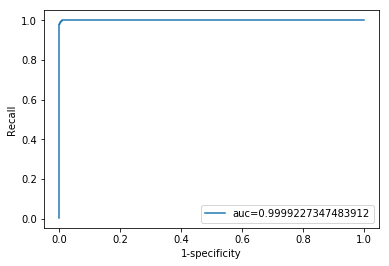

In [121]:
probs = new_model.predict(k_x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(e_y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(roc_auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')

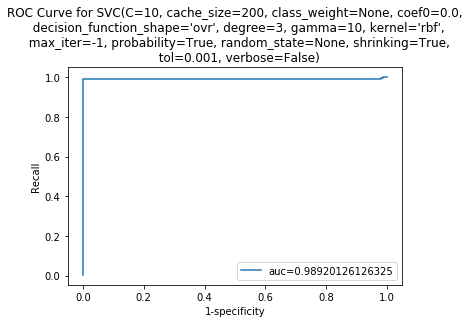

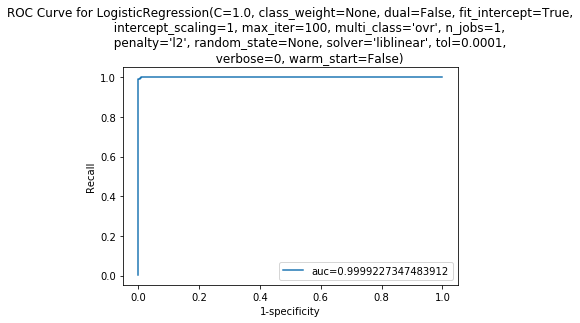

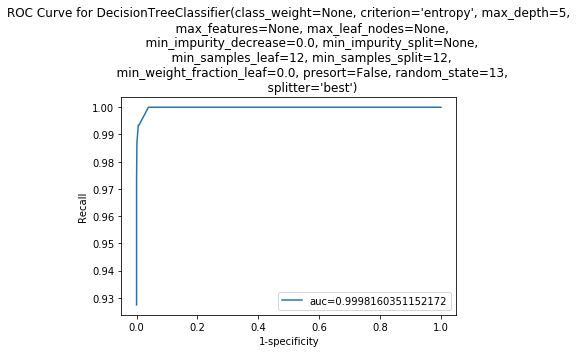

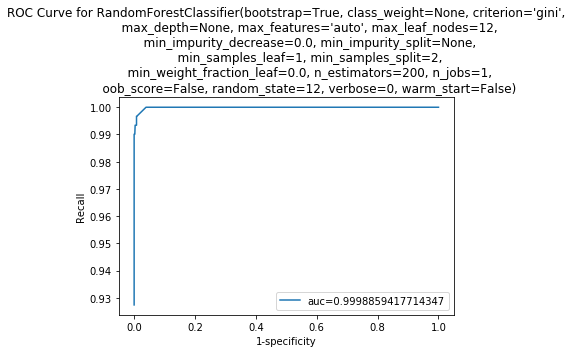

In [119]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
models = [grid_svm.best_estimator_, lr_model, Grid_tree.best_estimator_, Grid_forest.best_estimator_]
for model in models:
    probs = model.predict_proba(e_x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(e_y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,label="auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.ylabel('Recall')
    plt.xlabel('1-specificity')
    index = models.index(model)
    plt.title('ROC Curve for ' + str(models[index]))
    plt.show()